## 라이브러리 로드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 10.8 MB/s eta 0:00:00


## 데이터 로드
* parquet 형식 로드를 위한 라이브러리가 설치되어 있어야 합니다.

In [ ]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [ ]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
 8   TotalPrice   541909 non-null  float64 
dtypes: category(5), float32(1), float64(2), int32(1)
memory usage: 19.3 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. 이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

* pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.
* 참고 : 슬라이드에서 중심극한정리를 찾아보세요.

In [ ]:
df['TotalPrice'].describe()

count    541909.000000
mean         17.987795
std         378.810824
min     -168469.600000
25%           3.400000
50%           9.750000
75%          17.400000
max      168469.600000
Name: TotalPrice, dtype: float64

In [ ]:
sample = df.sample(1000)
sample['TotalPrice'].describe()

count    1000.000000
mean       17.847720
std        47.151512
min       -23.800000
25%         3.290000
50%         8.500000
75%        17.340000
max      1048.950000
Name: TotalPrice, dtype: float64

# 미션1 답변
### 모집단과 표본의 차이
- 모집단
  - mean         17.987795
  - std         378.810824
- 표본
  - mean       17.847720
  - std        47.151512
- 평균은 비슷하지만 표준편차는 차이가 큽니다. 모집단에 비해 샘플 사이즈가 1/542로 작기 때문이라고 볼 수 있습니다. 포함된 아웃라이어 차이도 있을 수 있습니다

### 중심극한정리
- 모집단의 분포와 상관 없이, 모집단에서 추출한 샘플의 크기가 충분히 크다면 이 샘플들의 평균은 정규 분포를 띤다는 말입니다. 이 정리를 통해 모집단의 평균을 추정할 수 있습니다.

## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [ ]:
from scipy import stats
df.groupby('Country')['TotalPrice'].count().sort_values(ascending=False).head(2)

Country
United Kingdom    495478
Germany             9495
Name: TotalPrice, dtype: int64

In [ ]:
uk = df[df['Country'] == 'United Kingdom']['TotalPrice']
gmy = df[df['Country'] == 'Germany']['TotalPrice']


print('UK: ' , uk.mean() ,  '\nGermany: ', gmy.mean())

UK:  16.525065419655366 
Germany:  23.348942601369142


In [ ]:
t_statistic, p_value = stats.ttest_ind(uk, gmy, equal_var=False)
t_statistic, p_value

(-10.046360185819829, 9.823416115791871e-24)

# 미션2 답변
- 두 집단간 TotalPrice 의 차이는 통계적으로 유의미합니다
- p_value : 9.82*10^-24 로, 0에 가까운 값입니다
- t_statistic 은 집단 간 분산의 차이를 나타냅니다. t_statistic 이 높다면 해당 집단 내 분산보다 비교 집단 간 분산이 높습니다. p_value 는 해당 null hypothesis 가 참이라고 할 때, 주어진 t_statistc 과 같거나 더 극단적인 케이스를 마주할 확률입니다. 여기서 p_value 가 무척 낮기때문에, 해당 t_statistic 도 무척 극단적인 값이라고 할 수 있습니다. 즉, 귀무 가설은 거짓입니다.
- Type1 Error: H1 가 거짓인데 참이라고 할 확률
- Type2 Error: H1 가 참인데 거짓이라고 할 확률
- 여기서 Type1 Error 는 두 국가의 TotalPrice 가 같은데 같지 않다고 할 확률입니다.

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. 다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

* 참고 : [pandas.DataFrame.describe — pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
* 참고 : 슬라이드의 "기술 통계" 부분을 찾아보세요.

In [ ]:
weekday_data['UnitPrice'].describe()

count    477534.000000
mean          4.843425
std         103.032058
min      -11062.060000
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
weekend_data['UnitPrice'].describe()

count    64375.000000
mean         2.887824
std          7.959497
min          0.000000
25%          1.250000
50%          1.850000
75%          3.750000
max       1236.750000
Name: UnitPrice, dtype: float64

In [ ]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

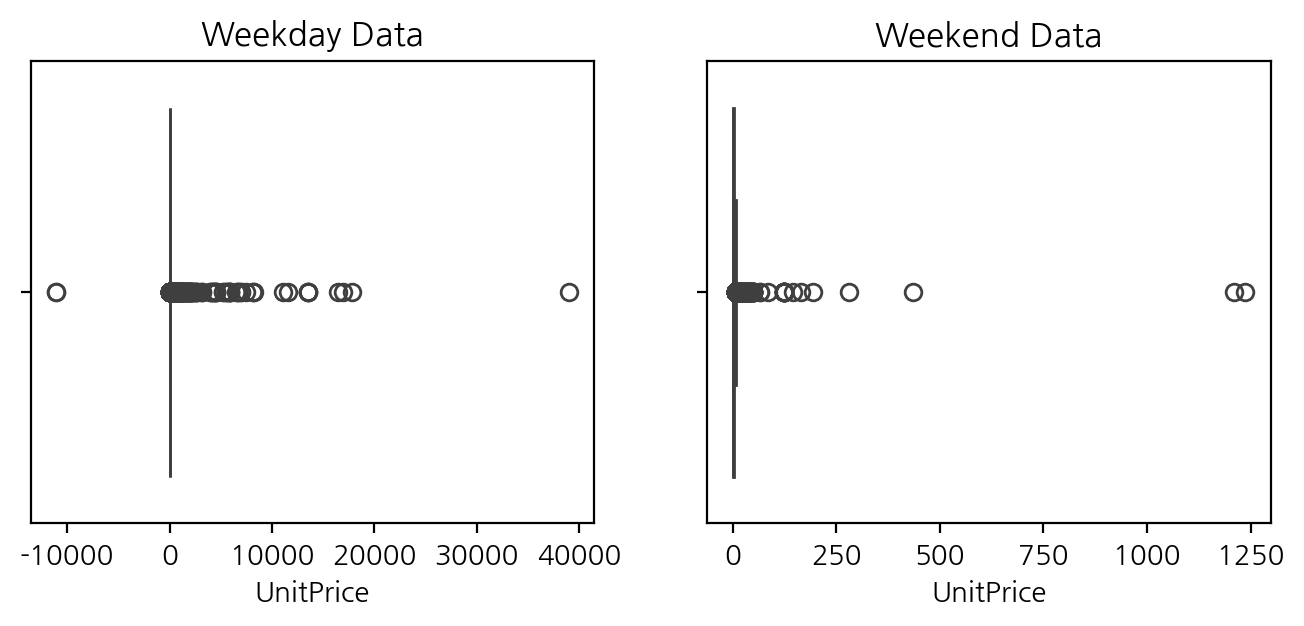

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
sns.boxplot(data=weekday_data, x='UnitPrice', ax=ax[0])
ax[0].set_title('Weekday Data')

sns.boxplot(data=weekend_data, x="UnitPrice", ax=ax[1])
ax[1].set_title('Weekend Data');

In [ ]:
print(weekday_data['UnitPrice'].dtype)
print(weekend_data['UnitPrice'].dtype)

float64
float64


<ipython-input-63-5a7d9e038c58>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)


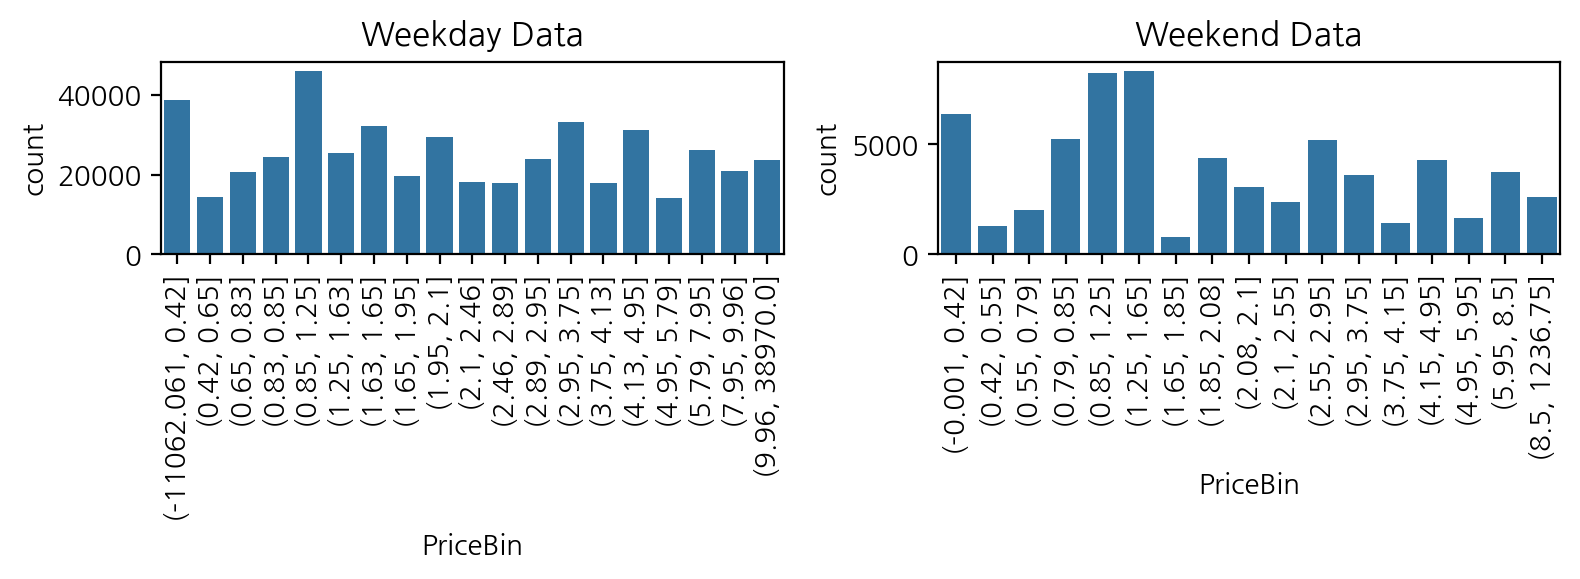

In [ ]:
# histplot 은 생성에 시간이 너무 오래 걸리기도 하고 아웃라이어도 있어 binning 을 합니다
#binning 이 안되서 dropna 합니다
weekday_data = weekday_data.dropna(subset=['UnitPrice'])
weekend_data = weekend_data.dropna(subset=['UnitPrice'])


weekday_data['PriceBin'] = pd.qcut(weekday_data['UnitPrice'], 20, duplicates='drop')
weekend_data['PriceBin'] = pd.qcut(weekend_data['UnitPrice'], 20, duplicates='drop')

# categorical 은 histplot 이 안되서 countplot 으로 바꿔줍니다
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
sns.countplot(data=weekday_data, x='PriceBin', ax=ax[0])
ax[0].set_title('Weekday Data')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.countplot(data=weekend_data, x="PriceBin", ax=ax[1])
ax[1].set_title('Weekend Data')
plt.xticks(rotation=90)

plt.tight_layout();

# 미션 3 답변
- UnitPrice 데이터에 아웃라이어 영향이 커서 전체 분포가 잘 보이지 않습니다.
- 특히 주중의 음수 값은 제거해줘야 할 것으로 보입니다
- 아웃라이어 영향을 줄이기 위해 binning 을 했더니 categorical data 가 되어 histplot 이 아니라 countplot 을 그렸습니다
  - histplot 을 그리기엔 데이터셋이 너무 크기도 합니다
- 들쭉날쭉한 countplot 에서 미루어 볼 때, 데이터의 분포가 균등하지 않습니다

## 미션4)  'TotalPrice'의 중간값이 특정 값과 다른지 검증하기 위해 비모수 검정 (예: 맨-휘트니 U-검정)을 사용하세요. 검증 결과에 대해 비즈니스 관점에서 분석해 주세요.

* 비모수 검정은 데이터가 정규 분포를 따르지 않거나, 정규 분포에 대한 가정을 할 수 없을 때 사용됩니다. 특히, 작은 표본 크기, 이상치의 존재, 순위나 순서와 같은 비정량적 데이터에 적합합니다. 또한, 두 그룹 간의 중앙값이나 분포의 형태가 다를 때 비모수 검정을 사용할 수 있습니다.

* 맨-휘트니 U-검정은 두 독립적인 표본 간에 중앙값의 차이를 비교하는 데 사용됩니다. 이 검정은 두 그룹의 데이터가 서로 독립적이며, 최소한 서열 척도로 측정되어야 합니다. 데이터의 분포 형태에 대한 가정이 필요 없으며, 크기가 다른 두 표본에 대해서도 사용할 수 있습니다. 이 검정은 데이터의 중앙값이 특정 값과 다른지 여부를 검증하는 데 유용합니다.

다음의 주어진 코드를 활용해 주세요.

```python
from scipy.stats import mannwhitneyu
# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
```

* 참고 : https://www.ibm.com/docs/ko/spss-statistics/beta?topic=tests-mann-whitney-u-test

In [ ]:
df['is_yearend'] = df['InvoiceDate'].apply(lambda x: 1 if x.month > 10 else 0)

In [ ]:
df['is_yearend'].value_counts(1)

0    0.718187
1    0.281813
Name: is_yearend, dtype: float64

In [ ]:
df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)

Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Name: TotalPrice, dtype: float64

In [ ]:
from scipy.stats import mannwhitneyu

# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
mannwhitneyu?

In [ ]:
uk_tp = df[df['Country'] == 'United Kingdom']['TotalPrice']
nth_tp = df[df['Country'] == 'Netherlands']['TotalPrice']

U1, p = mannwhitneyu(uk_tp, nth_tp)
U1, p

(147295757.0, 0.0)

In [ ]:
yr_end = df[df['is_yearend'] == 1]['TotalPrice']
yr_else = df[df['is_yearend'] != 1]['TotalPrice']

U1, p = mannwhitneyu(yr_end, yr_else)
U1, p

(27833470584.5, 9.015320868318487e-290)

In [ ]:
print(yr_end.median(), yr_else.median())

8.25 9.95


<Axes: title={'center': 'TotalPrice'}, xlabel='is_yearend'>

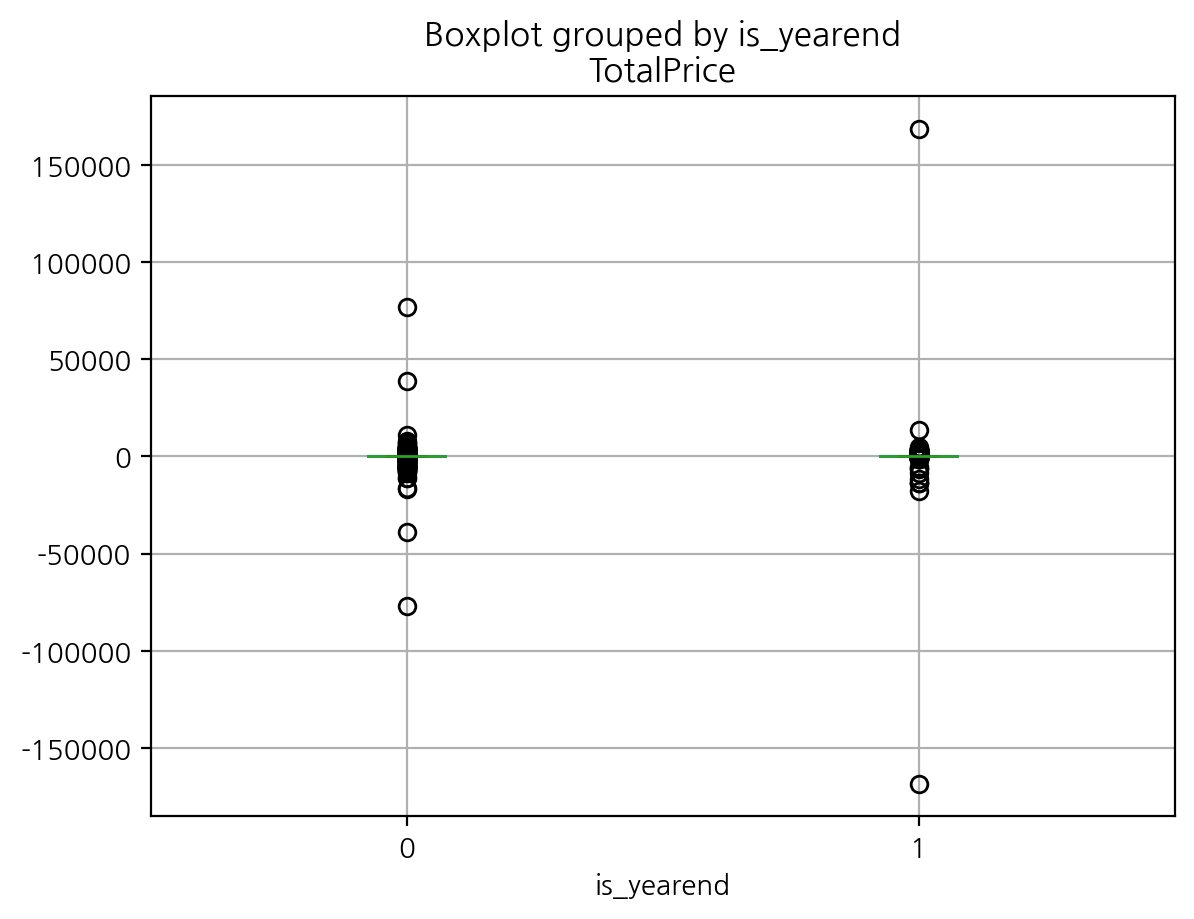

In [ ]:
df.boxplot(column = 'TotalPrice' , by = 'is_yearend')

In [ ]:
# drop outliers according to IQR

Q1 = df['TotalPrice'].quantile(0.25)
Q3 = df['TotalPrice'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to keep only rows within the bounds
df_filtered = df[(df['TotalPrice'] >= lower_bound) & (df['TotalPrice'] <= upper_bound)]

<Axes: title={'center': 'TotalPrice'}, xlabel='is_yearend'>

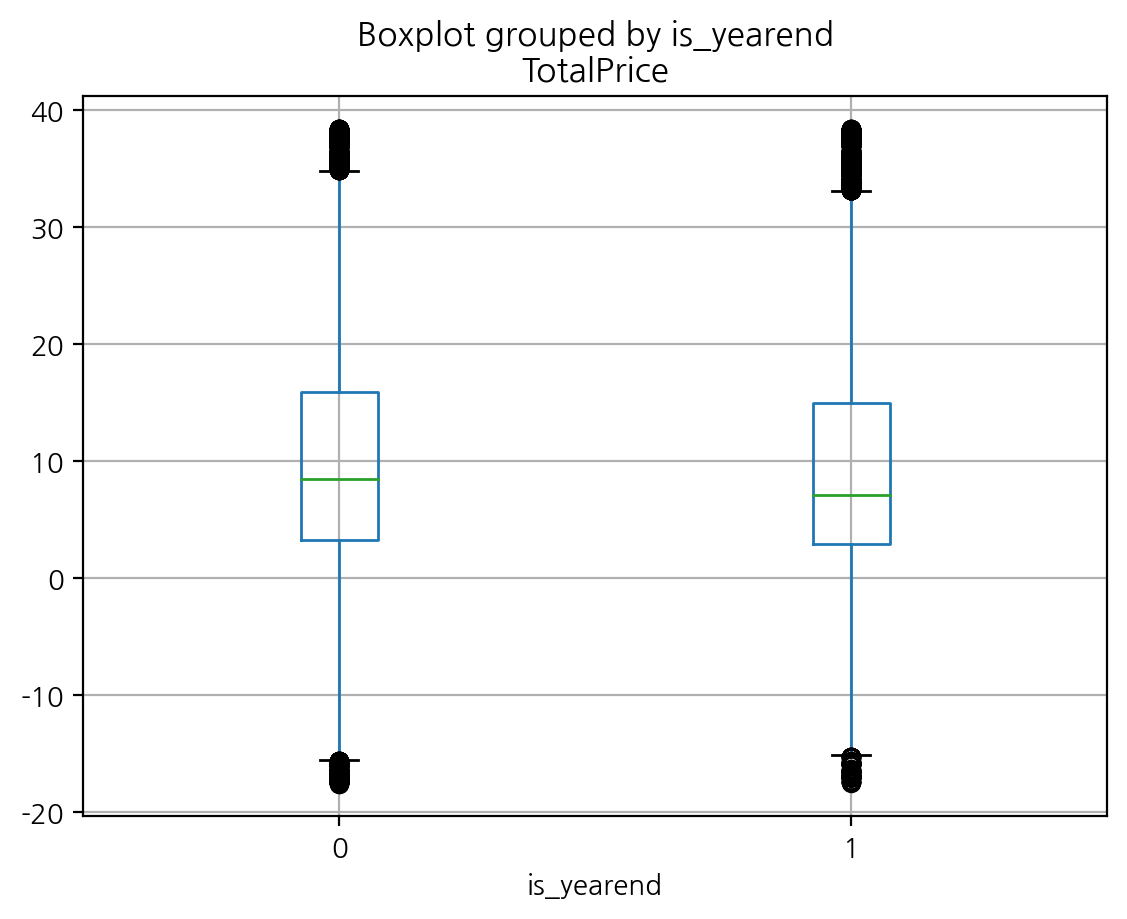

In [ ]:
df_filtered.boxplot(column = 'TotalPrice' , by = 'is_yearend')

In [ ]:
yr_end1 = df_filtered[df_filtered['is_yearend'] == 1]['TotalPrice']
yr_else1 = df_filtered[df_filtered['is_yearend'] != 1]['TotalPrice']

U1, p = mannwhitneyu(yr_end1, yr_else1)
U1, p

(23301818980.5, 0.0)

# 미션4 답변
- 문제에서 말하는 '특정 값' 이 무엇인지 알 수 없어, 임의로 두 국가 간 TotalPrice 에 대해 비모수 검정을 하겠습니다
- 해당 국가 둘은 TotalPrice 상위 2개국 입니다
- U1, p : (147295757.0, 0.0)
- U 값이 무척 크고, p 값이 0이기 때문에, 두 국가의 TotalPrice 사이에는 유의미한 차이가 있다고 할 수 있습니다
- 추가) InvoiceDate 기준 결제 월이 11, 12월인 '연말' 과 '그 외' 의 UnitPrice 중앙값을 비교해봤습니다
  - U1, p : (27833470584.5, 9.015320868318487e-290)
  - 여기서도 두 시기 간 TotalPrice 사이에는 유의미한 차이가 있습니다
  - 그냥 중앙값만 비교했을 땐 그렇게 차이가 커보이지 않는데..? 좀 이상하네요
  - 그래서 IQR 기준 아웃라이어를 제거했는데, 여전히 (23301818980.5, 0.0) 입니다. 여전히 통계적으로 유의미하게 둘 사이에 차이가 있습니다.



## 미션5) UnitPrice 컬럼에 대한 95% 신뢰구간을 구하고  seaborn 으로 신뢰구간을 시각화 해주세요. 그리고 이 신뢰구간이 비즈니스 결정에 어떻게 활용될 수 있는지 설명하세요.

In [ ]:
from scipy import stats
stats.t.interval?
# stats.t.interval(confidence, *args, **kwds)

In [ ]:
mean = df['UnitPrice'].mean()
sem = stats.sem(df['UnitPrice'])

stats.t.interval(0.95, len(df['UnitPrice'].dropna())-1, loc=mean, scale=sem)

(4.353492734282087, 4.868734517894939)

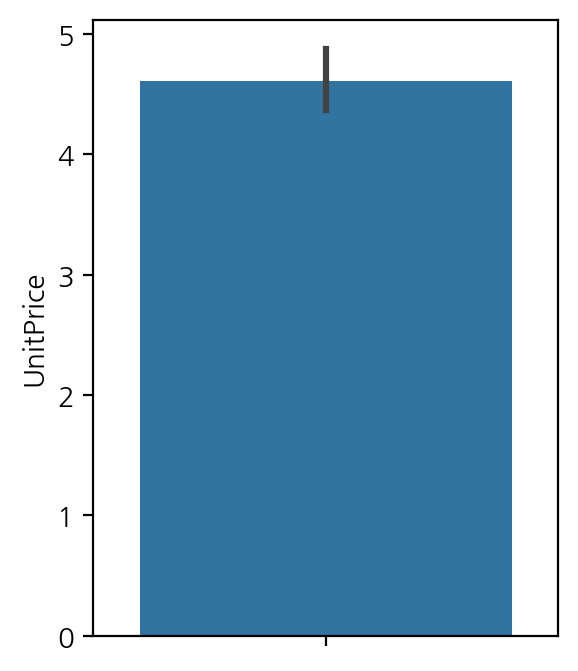

In [ ]:
plt.figure(figsize=(3,4))
sns.barplot(data=df, y='UnitPrice', errorbar='ci');

# 미션5 답변
- Unit Price 는 95%의 확률로 (4.353492734282087, 4.868734517894939) 범위 안에 있습니다
- 결제가 이루어진 아이템들의 UnitPrice 에 대한 신뢰구간은 가격 설정이나 마켓 포지셔닝 시 참고할 기준 가격에 대한 지표가 될 수 있습니다.